# Forecast | Time Series | Media Movil | Suavización Exponencial

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Data

In [3]:
df = pd.read_csv ('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'],)
df.head()

,date,value
0,1991-07-01,3.526591
1,1991-08-01,3.180891
2,1991-09-01,3.252221
3,1991-10-01,3.611003
4,1991-11-01,3.565869


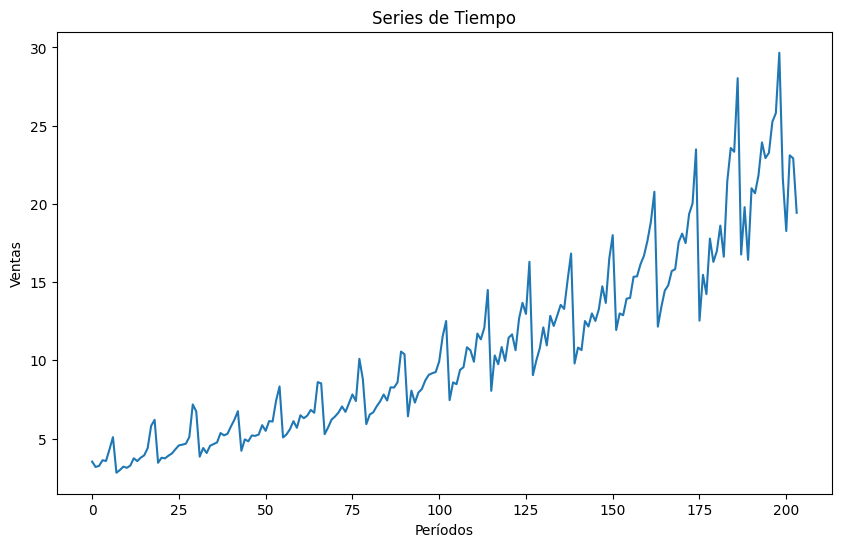

In [4]:
plt.figure(figsize=(10,6))
plt.plot(df.index,df['value'])

plt.xlabel('Períodos')
plt.ylabel('Ventas')
plt.title('Series de Tiempo')
plt.show()

## Manipulación de datos

In [5]:
df['year'] = df['date'].apply(lambda x: pd.Timestamp(x).strftime('%Y'))
df

,date,value,year
0,1991-07-01,3.526591,1991
1,1991-08-01,3.180891,1991
2,1991-09-01,3.252221,1991
3,1991-10-01,3.611003,1991
4,1991-11-01,3.565869,1991
...,...,...,...
199,2008-02-01,21.654285,2008
200,2008-03-01,18.264945,2008
201,2008-04-01,23.107677,2008
202,2008-05-01,22.912510,2008


In [6]:
anual = df.groupby('year').sum()
anual = anual.reset_index()
anual

C:\Users\hp\AppData\Local\Temp\ipykernel_560\4093919967.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  anual = df.groupby('year').sum()


,year,value
0,1991,21.442946
1,1992,45.686946
2,1993,55.532688
3,1994,60.816080
4,1995,67.326599
5,1996,77.397927
6,1997,85.131672
7,1998,93.310626
8,1999,105.959043
9,2000,122.496586


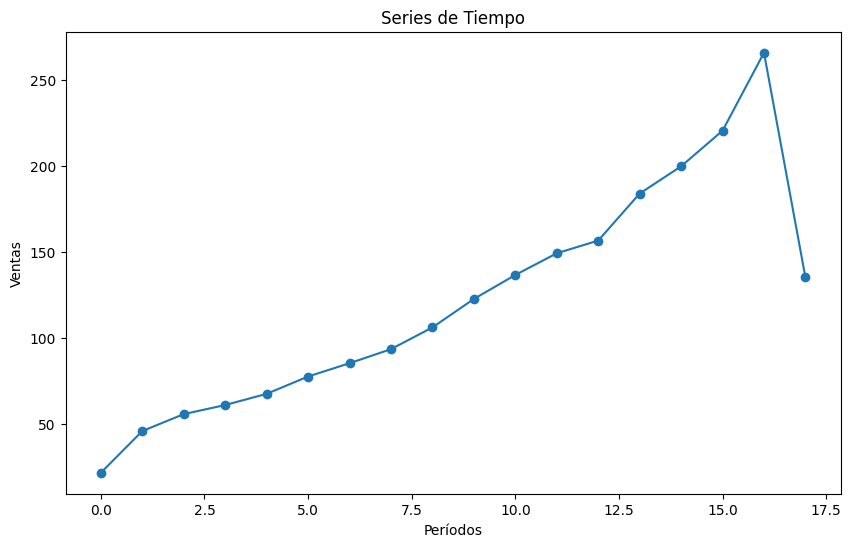

In [7]:
plt.figure(figsize=(10,6))
plt.plot(anual.index,anual['value'], marker='o')

plt.xlabel('Períodos')
plt.ylabel('Ventas')
plt.title('Series de Tiempo')
plt.show()

In [8]:
anual['MA'] = anual['value'].rolling(window=3).mean().shift(1)
anual

,year,value,MA
0,1991,21.442946,NaN
1,1992,45.686946,NaN
2,1993,55.532688,NaN
3,1994,60.816080,40.887527
4,1995,67.326599,54.011905
5,1996,77.397927,61.225122
6,1997,85.131672,68.513535
7,1998,93.310626,76.618732
8,1999,105.959043,85.280075
9,2000,122.496586,94.800447


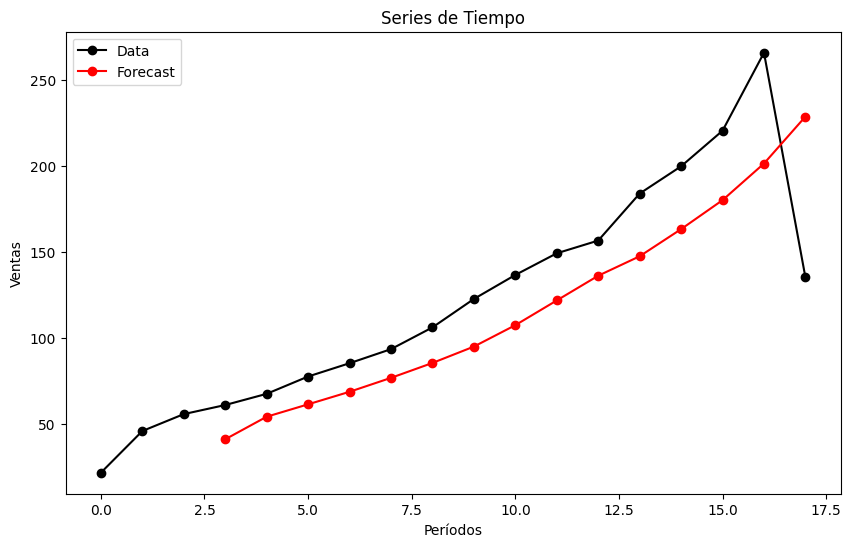

In [9]:
plt.figure(figsize=(10,6))
plt.plot(anual.index,anual['value'], marker='o', color = 'black', label="Data")
plt.plot(anual.index,anual['MA'], marker='o', color = 'red', label="Forecast")

plt.xlabel('Períodos')
plt.ylabel('Ventas')
plt.title('Series de Tiempo')
plt.legend(loc='best')
plt.show()

In [10]:
anual.loc[len(anual)] = [int(anual.iloc[len(anual)-1][0])+1,0,0]
anual

,year,value,MA
0,1991,21.442946,NaN
1,1992,45.686946,NaN
2,1993,55.532688,NaN
3,1994,60.816080,40.887527
4,1995,67.326599,54.011905
5,1996,77.397927,61.225122
6,1997,85.131672,68.513535
7,1998,93.310626,76.618732
8,1999,105.959043,85.280075
9,2000,122.496586,94.800447


In [11]:
anual['MA'] = anual['value'].rolling(window=3).mean().shift(1)

anual['year'] = anual['year'].astype(int)
anual['value'] = anual['value'].astype(float)
anual['MA'] = anual['MA'].astype(float)

anual

,year,value,MA
0,1991,21.442946,NaN
1,1992,45.686946,NaN
2,1993,55.532688,NaN
3,1994,60.816080,40.887527
4,1995,67.326599,54.011905
5,1996,77.397927,61.225122
6,1997,85.131672,68.513535
7,1998,93.310626,76.618732
8,1999,105.959043,85.280075
9,2000,122.496586,94.800447


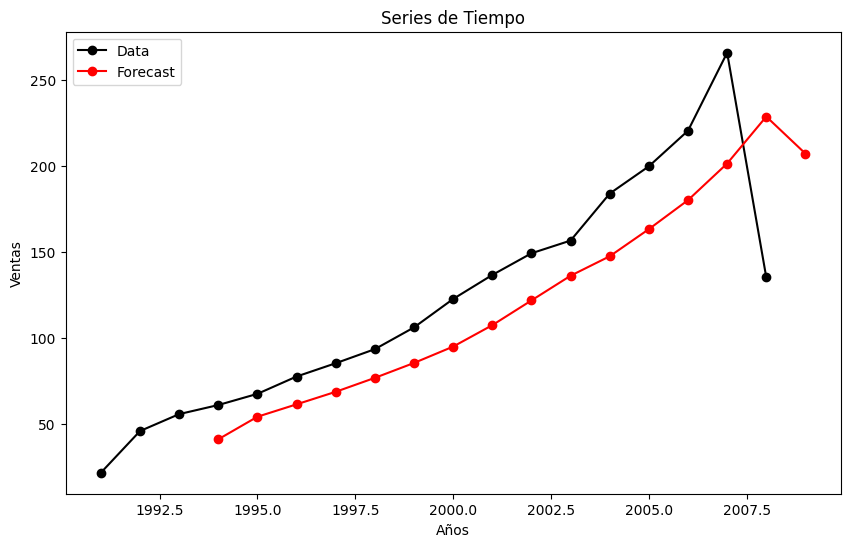

In [12]:
plt.figure(figsize=(10,6))
plt.plot(anual['year'][:-1],anual['value'][:-1], marker='o', color = 'black', label="Data")
plt.plot(anual['year'],anual['MA'], marker='o', color = 'red', label="Forecast")

plt.xlabel('Años')
plt.ylabel('Ventas')
plt.title('Series de Tiempo')
plt.legend(loc='best')
plt.show()

In [13]:
for n in range(3):
    anual.loc[len(anual)] = [int(anual.iloc[len(anual)-1][0])+1,0,0]
anual

,year,value,MA
0,1991,21.442946,NaN
1,1992,45.686946,NaN
2,1993,55.532688,NaN
3,1994,60.816080,40.887527
4,1995,67.326599,54.011905
5,1996,77.397927,61.225122
6,1997,85.131672,68.513535
7,1998,93.310626,76.618732
8,1999,105.959043,85.280075
9,2000,122.496586,94.800447


In [14]:
anual['MA'] = anual['value'].rolling(window=3).mean().shift(1)

anual['year'] = anual['year'].astype(int)
anual['value'] = anual['value'].astype(float)
anual['MA'] = anual['MA'].astype(float)

anual

,year,value,MA
0,1991,21.442946,NaN
1,1992,45.686946,NaN
2,1993,55.532688,NaN
3,1994,60.816080,40.887527
4,1995,67.326599,54.011905
5,1996,77.397927,61.225122
6,1997,85.131672,68.513535
7,1998,93.310626,76.618732
8,1999,105.959043,85.280075
9,2000,122.496586,94.800447


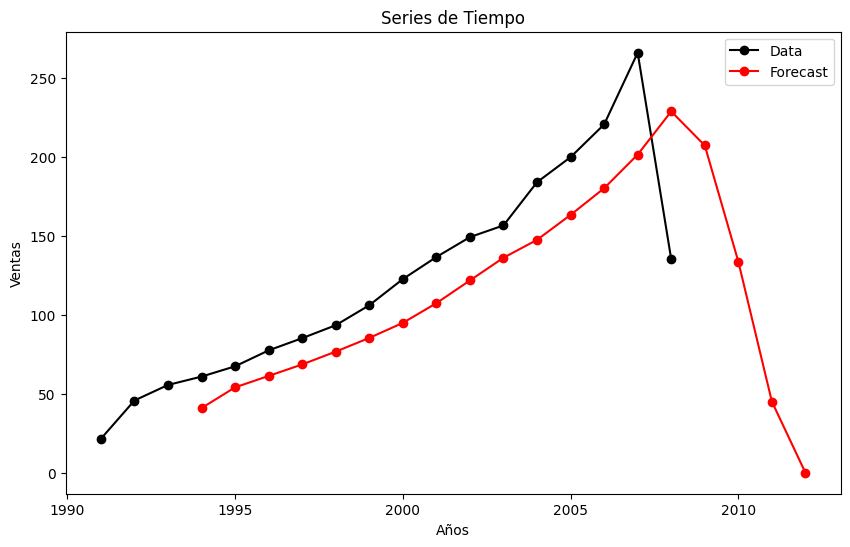

In [15]:
plt.figure(figsize=(10,6))
plt.plot(anual['year'][:-4],anual['value'][:-4], marker='o', color = 'black', label="Data")
plt.plot(anual['year'],anual['MA'], marker='o', color = 'red', label="Forecast")

plt.xlabel('Años')
plt.ylabel('Ventas')
plt.title('Series de Tiempo')
plt.legend(loc='best')
plt.show()

## Suavización Exponencial | StatsModels.

In [16]:
anual = df.groupby('year').sum()
anual = anual.reset_index()
anual['MA'] = anual['value'].rolling(window=3).mean().shift()
anual

C:\Users\hp\AppData\Local\Temp\ipykernel_560\755192111.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  anual = df.groupby('year').sum()


,year,value,MA
0,1991,21.442946,NaN
1,1992,45.686946,NaN
2,1993,55.532688,NaN
3,1994,60.816080,40.887527
4,1995,67.326599,54.011905
5,1996,77.397927,61.225122
6,1997,85.131672,68.513535
7,1998,93.310626,76.618732
8,1999,105.959043,85.280075
9,2000,122.496586,94.800447


In [17]:
from statsmodels.tsa.api import SimpleExpSmoothing

In [18]:
mod = SimpleExpSmoothing(anual['value']).fit(smoothing_level = 0.5, optimized=False)
anual['ES'] = mod.fittedvalues
anual 

,year,value,MA,ES
0,1991,21.442946,NaN,21.442946
1,1992,45.686946,NaN,21.442946
2,1993,55.532688,NaN,33.564946
3,1994,60.816080,40.887527,44.548817
4,1995,67.326599,54.011905,52.682448
5,1996,77.397927,61.225122,60.004524
6,1997,85.131672,68.513535,68.701225
7,1998,93.310626,76.618732,76.916448
8,1999,105.959043,85.280075,85.113537
9,2000,122.496586,94.800447,95.536290


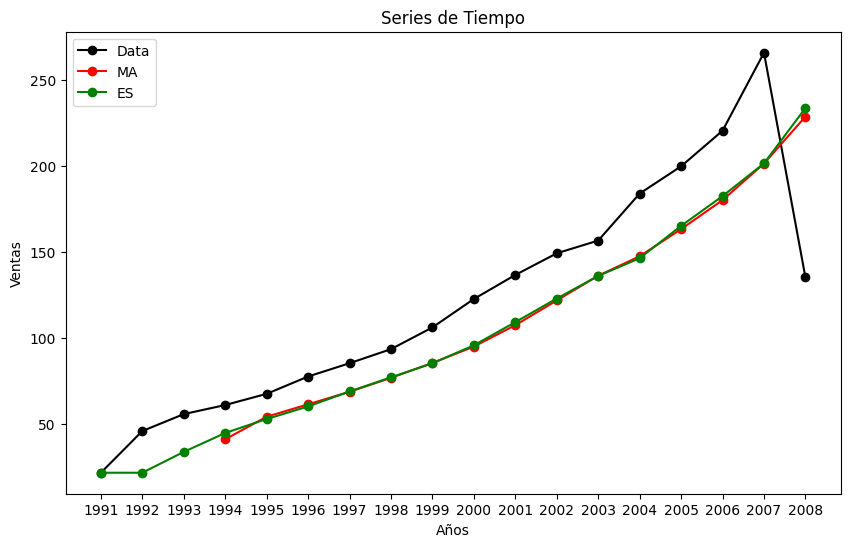

In [19]:
plt.figure(figsize=(10,6))
plt.plot(anual['year'],anual['value'], marker='o', color = 'black', label="Data")
plt.plot(anual['year'],anual['MA'], marker='o', color = 'red', label="MA")
plt.plot(anual['year'],anual['ES'], marker='o', color = 'green', label="ES")

plt.xlabel('Años')
plt.ylabel('Ventas')
plt.title('Series de Tiempo')
plt.legend(loc='best')
plt.show()

## Error | Sklearn

In [20]:
from sklearn.metrics import mean_squared_error as MSE 

In [21]:
y_true = anual['value']

y_ma = anual['MA']
y_es = anual['ES']

In [22]:
# MSE media movil
MSE = (y_true[3:] , y_ma.dropna())


In [23]:
# MSe suavisación exponencial
MSE = (y_true , y_ma)


In [24]:
mod.summary()

Dep. Variable:,value,No. Observations:,18
Model:,SimpleExpSmoothing,SSE,23329.700
Optimized:,False,AIC,133.008
Trend:,None,BIC,134.789
Seasonal:,None,AICC,136.085
Seasonal Periods:,None,Date:,"Wed, 19 Apr 2023"
Box-Cox:,False,Time:,19:04:23
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.5000000,alpha,False
initial_level,21.442946,l.0,False


## Forecast | Exponential Smoothing

In [25]:
pred = mod.forecast(5)
pred

18    184.282778
19    184.282778
20    184.282778
21    184.282778
22    184.282778
dtype: float64

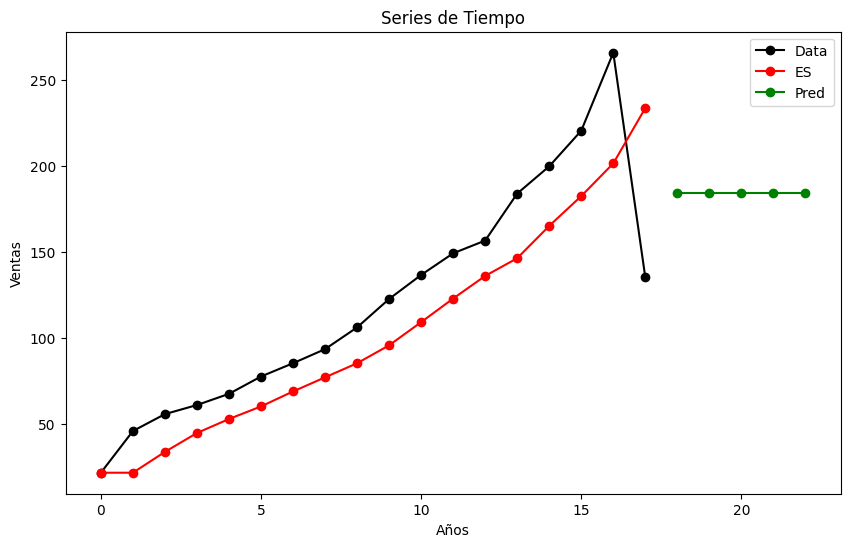

In [26]:
plt.figure(figsize=(10,6))
plt.plot(anual.index,anual['value'], marker='o', color = 'black', label="Data")
plt.plot(anual.index,anual['ES'], marker='o', color = 'red', label="ES")
plt.plot(pred, marker='o', color = 'green', label="Pred")

plt.xlabel('Años')
plt.ylabel('Ventas')
plt.title('Series de Tiempo')
plt.legend(loc='best')
plt.show()

In [27]:
expo_s = pd.concat([anual['ES'], pred])
expo_s

0      21.442946
1      21.442946
2      33.564946
3      44.548817
4      52.682448
5      60.004524
6      68.701225
7      76.916448
8      85.113537
9      95.536290
10    109.016438
11    122.741940
12    135.904038
13    146.184150
14    164.991542
15    182.323569
16    201.339122
17    233.529044
18    184.282778
19    184.282778
20    184.282778
21    184.282778
22    184.282778
dtype: float64

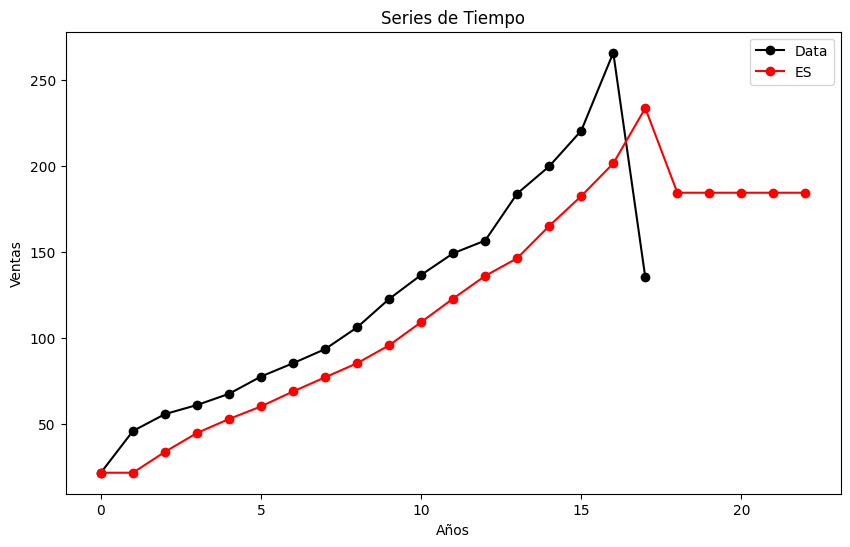

In [28]:
plt.figure(figsize=(10,6))
plt.plot(anual.index,anual['value'], marker='o', color = 'black', label="Data")
plt.plot(expo_s, marker='o', color = 'red', label="ES")


plt.xlabel('Años')
plt.ylabel('Ventas')
plt.title('Series de Tiempo')
plt.legend(loc='best')
plt.show()

## Suavización Exponencial | StatsModels | Aplicando los conceptos

In [29]:
df

,date,value,year
0,1991-07-01,3.526591,1991
1,1991-08-01,3.180891,1991
2,1991-09-01,3.252221,1991
3,1991-10-01,3.611003,1991
4,1991-11-01,3.565869,1991
...,...,...,...
199,2008-02-01,21.654285,2008
200,2008-03-01,18.264945,2008
201,2008-04-01,23.107677,2008
202,2008-05-01,22.912510,2008


In [30]:
mod = SimpleExpSmoothing(df['value']).fit(smoothing_level=0.5, optimized=False)
df['ES'] = mod.fittedvalues
pred = mod.forecast(30)

expo_s = pd.concat([df['ES'], pred])

In [31]:
from sklearn.metrics import mean_squared_error as MSE 
from sklearn.metrics import mean_absolute_percentage_error as MAPE

print(f'MSE: {MSE(df["value"], df["ES"])}')
print(f'MAPE: {MAPE(df["value"], df["ES"])}')

MSE: 4.060010524676766
MAPE: 0.1277276193446603


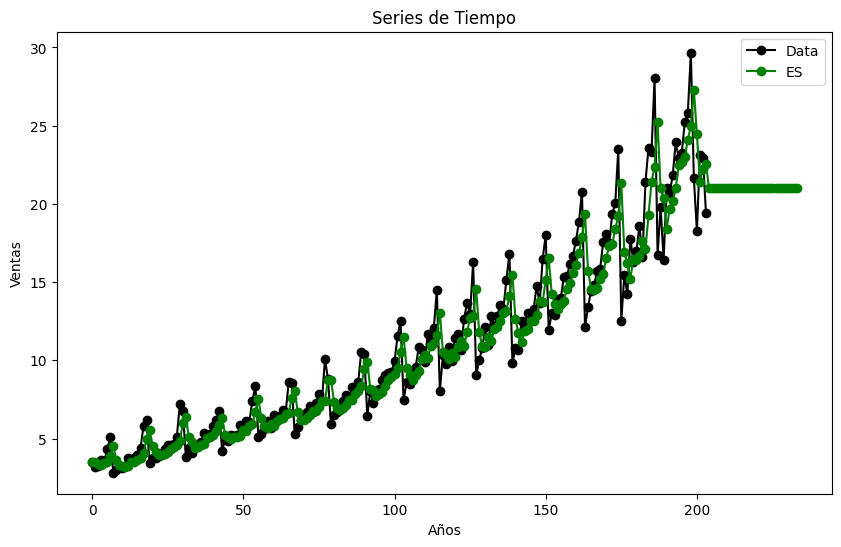

In [32]:
plt.figure(figsize=(10,6))
plt.plot(df.index, df['value'], marker='o', color = 'black', label="Data")
plt.plot(expo_s, marker='o', color = 'Green', label="ES")


plt.xlabel('Años')
plt.ylabel('Ventas')
plt.title('Series de Tiempo')
plt.legend(loc='best')
plt.show()